In [5]:
!pip install tweepy

In [7]:
!pip install wordcloud

In [9]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=1f0d24d961df8429803eb245b2ceaf2b4019b1f8bd516ca7fe043015ebef8a9a
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [10]:
!pip install selenium

In [13]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1 - Business Problem

1) Extract reviews of any product from ecommerce website like snapdeal and amazon

2) Perform sentimental analysis

# 2 - Data collection and description

### 2.1 Connecting to Amazom and download reviews

In [17]:
oneplus_reviews=[]

In [47]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/OnePlus-Nord-Shadow-128GB-Storage/product-reviews/B0B3CQBRB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

### 2.2 Downloading review from Amazon.in for the phone OnePlus Nord 2T 5G 

In [48]:
oneplus_reviews = list(set(oneplus_reviews))

### 2.3 Cleaning the text

In [49]:
txt_upd = ' '.join(oneplus_reviews)

In [55]:
txt_upd

' good mobile premium one plus phone but worst battery life using this device for more than years now no complaints after using one plus nord one plus and one plus i find this is ok phone even my one plus nord had almost similar features may be expectation from one plus has gone so much but i never had similar feeling what i had upgrading to one plus or to get one plus when i got and i could feel really a great enhanced experience may be because i was already using nord so it did not give me same feeling jio video calling suddenly is stopped it s default is duoay be i m missing some settingsover all no doubt its value for money sold it after years and still got good price amazing phone thanks seller and amazon i had to pay extra as my previous order was canceled itself and i did not know about that due to which i am not so much happy with the product as i costed me expensive then before build quality perfect h premium feel hota h phone only because of glass backlight weight h or kafi h

In [58]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character

In [59]:
txt_upd

' good mobile premium one plus phone but worst battery life using this device for more than years now no complaints after using one plus nord one plus and one plus i find this is ok phone even my one plus nord had almost similar features may be expectation from one plus has gone so much but i never had similar feeling what i had upgrading to one plus or to get one plus when i got and i could feel really a great enhanced experience may be because i was already using nord so it did not give me same feeling jio video calling suddenly is stopped it s default is duoay be i m missing some settingsover all no doubt its value for money sold it after years and still got good price amazing phone thanks seller and amazon i had to pay extra as my previous order was canceled itself and i did not know about that due to which i am not so much happy with the product as i costed me expensive then before build quality perfect h premium feel hota h phone only because of glass backlight weight h or kafi h

In [51]:
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers

In [57]:
txt_upd

' good mobile premium one plus phone but worst battery life using this device for more than years now no complaints after using one plus nord one plus and one plus i find this is ok phone even my one plus nord had almost similar features may be expectation from one plus has gone so much but i never had similar feeling what i had upgrading to one plus or to get one plus when i got and i could feel really a great enhanced experience may be because i was already using nord so it did not give me same feeling jio video calling suddenly is stopped it s default is duoay be i m missing some settingsover all no doubt its value for money sold it after years and still got good price amazing phone thanks seller and amazon i had to pay extra as my previous order was canceled itself and i did not know about that due to which i am not so much happy with the product as i costed me expensive then before build quality perfect h premium feel hota h phone only because of glass backlight weight h or kafi h

In [61]:
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [62]:
txt_upd

' good mobile premium one plus phone but worst battery life using this device for more than years now no complaints after using one plus nord one plus and one plus i find this is ok phone even my one plus nord had almost similar features may be expectation from one plus has gone so much but i never had similar feeling what i had upgrading to one plus or to get one plus when i got and i could feel really a great enhanced experience may be because i was already using nord so it did not give me same feeling jio video calling suddenly is stopped it s default is duoay be i m missing some settingsover all no doubt its value for money sold it after years and still got good price amazing phone thanks seller and amazon i had to pay extra as my previous order was canceled itself and i did not know about that due to which i am not so much happy with the product as i costed me expensive then before build quality perfect h premium feel hota h phone only because of glass backlight weight h or kafi h

In [53]:
text_tokens = word_tokenize(txt_upd)

In [63]:
text_tokens

['good',
 'mobile',
 'premium',
 'one',
 'plus',
 'phone',
 'but',
 'worst',
 'battery',
 'life',
 'using',
 'this',
 'device',
 'for',
 'more',
 'than',
 'years',
 'now',
 'no',
 'complaints',
 'after',
 'using',
 'one',
 'plus',
 'nord',
 'one',
 'plus',
 'and',
 'one',
 'plus',
 'i',
 'find',
 'this',
 'is',
 'ok',
 'phone',
 'even',
 'my',
 'one',
 'plus',
 'nord',
 'had',
 'almost',
 'similar',
 'features',
 'may',
 'be',
 'expectation',
 'from',
 'one',
 'plus',
 'has',
 'gone',
 'so',
 'much',
 'but',
 'i',
 'never',
 'had',
 'similar',
 'feeling',
 'what',
 'i',
 'had',
 'upgrading',
 'to',
 'one',
 'plus',
 'or',
 'to',
 'get',
 'one',
 'plus',
 'when',
 'i',
 'got',
 'and',
 'i',
 'could',
 'feel',
 'really',
 'a',
 'great',
 'enhanced',
 'experience',
 'may',
 'be',
 'because',
 'i',
 'was',
 'already',
 'using',
 'nord',
 'so',
 'it',
 'did',
 'not',
 'give',
 'me',
 'same',
 'feeling',
 'jio',
 'video',
 'calling',
 'suddenly',
 'is',
 'stopped',
 'it',
 's',
 'default',
 

In [64]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

### 2.4 Create the DF

In [67]:
tf = TfidfVectorizer()

In [68]:
text_tf = tf.fit_transform(tokens_without_sw)

In [69]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [70]:
df

,aah,ability,absolutely,accepting,accessed,accidental,accuracy,accurate,active,activities,...,worse,worst,xs,xyz,year,years,yellowish,yielding,youtube,yt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
word_list = ' '.join(df)

In [72]:
wordcloud = WordCloud(background_color='black',
                      width=2800,
                      height=2400).generate(word_list)

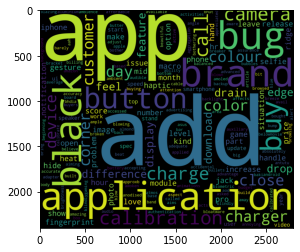

In [73]:
plt.imshow(wordcloud)

# 3 - Sentimental Analysis

In [74]:
with open("D:\\Harsha\\Data sciences\\Assignments\\Assignment_11_Text Mining\\positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [75]:
positive_words = positive_words[35:]

In [76]:
with open("D:\\Harsha\\Data sciences\\Assignments\\Assignment_11_Text Mining\\negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [77]:
negative_words = negative_words[35:]

In [78]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [79]:
wordcloud_neg = WordCloud(background_color='black',
                          width=1800,
                          height=1400).generate(txt_neg_in_nw)

In [80]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [81]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

# 4 - Conclusion

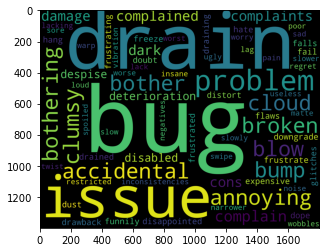

In [82]:
plt.imshow(wordcloud_neg)

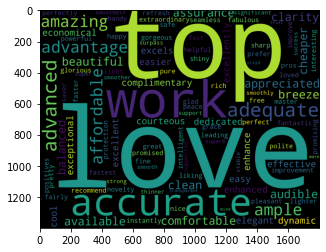

In [83]:
plt.imshow(wordcloud_pos)